In [2]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
import os, os.path as path

from spectrum import Spectrum
from common import DATA_FOLDER, tqdm, list_files

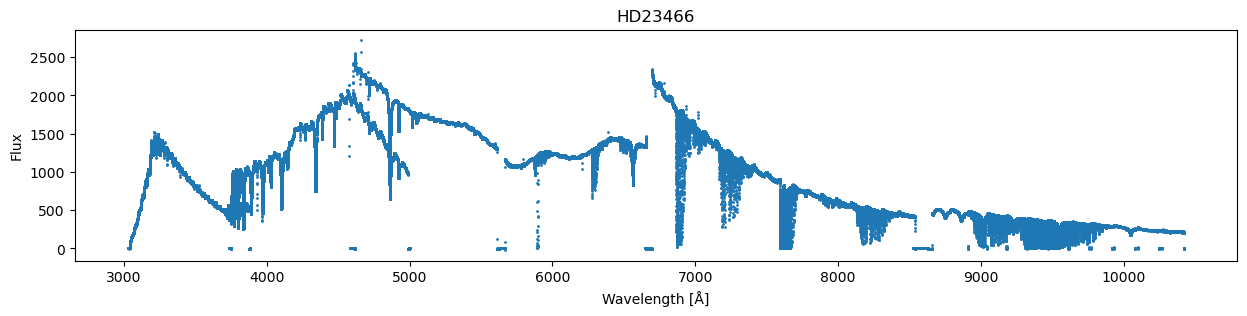

In [4]:
def load_fits_to_spectrum(target: str):
    target_dir = path.join(DATA_FOLDER, 'fits', target)
    wavelength_tot = np.array([])
    flux_tot = np.array([])
    
    for entry in os.listdir(target_dir):
        band_dir = path.join(target_dir, entry)

        if not path.isdir(band_dir):
            continue

        for datafile in list_files(band_dir):
            if not datafile.endswith('.fits'):
                print(f'[WARNING]: skipping unexpected datafile: {datafile}')
                continue

            with fits.open(datafile) as hdulist:
                header = hdulist[0].header
                starting_wvl = header['CRVAL1']
                stepsize_wvl = header['CDELT1']

                flux = hdulist[0].data
                wavelength = np.arange(0, len(flux), 1) * stepsize_wvl + starting_wvl
                wavelength_tot = np.concatenate((wavelength_tot, wavelength))
                flux_tot = np.concatenate((flux_tot, flux))

    # Sort based on wavelength
    sorted_idxs = np.argsort(wavelength_tot)
    return Spectrum(target, wavelength_tot[sorted_idxs], flux_tot[sorted_idxs])

hd23466 = load_fits_to_spectrum('HD23466')
# hd23466 = load_fits_to_spectrum('data/fits/HD23466/BLUE_346/HD23466_w346_n10_20180731_B.fits')

fig, ax = plt.subplots(1, 1, figsize=(15, 3))
hd23466.plot(ax)